In [1]:
%matplotlib notebook

from rlsm.datasets.synthetic import generate_data
from rlsm.rlsm import initialize_parameters
from rlsm import ReciprocityLSM

In [33]:
Y, X_dyad, params = generate_data(n_nodes=100, density=0.2, odds_ratio=2, 
                                  include_covariates=True, 
                                  random_state=0)

In [34]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, X_dyad=X_dyad, n_warmup=2500, n_samples=5000)

sample: 100%|██████████████████████████████████████████████| 7500/7500 [06:48<00:00, 18.37it/s, 63 steps of size 6.87e-02. acc. prob=0.83]


In [35]:
model.print_summary()

AUC: 0.907, AIC: 6818.182, BIC: 9447.067, DIC: 6492.050

                  mean       std    median      2.5%     97.5%     n_eff     r_hat
beta_dyad[0]     -1.05      0.04     -1.05     -1.13     -0.98   5909.22      1.00
beta_dyad[1]      1.04      0.04      1.03      0.96      1.11   6058.04      1.00
   dist_coef      0.02      0.16      0.03     -0.28      0.34   1527.43      1.00
       r_var      1.01      0.19      0.99      0.68      1.40   1510.89      1.00
  recip_coef      0.50      0.25      0.50      0.00      0.98   1593.35      1.00
       s_var      1.01      0.19      1.00      0.66      1.40   1204.23      1.00
     sr_corr      0.56      0.14      0.56      0.28      0.84    819.81      1.00
       z_var      1.15      0.20      1.14      0.78      1.56   1396.72      1.00

Number of divergences: 31


## MSE Latent Space

0.37083767924470207


<IPython.core.display.Javascript object>


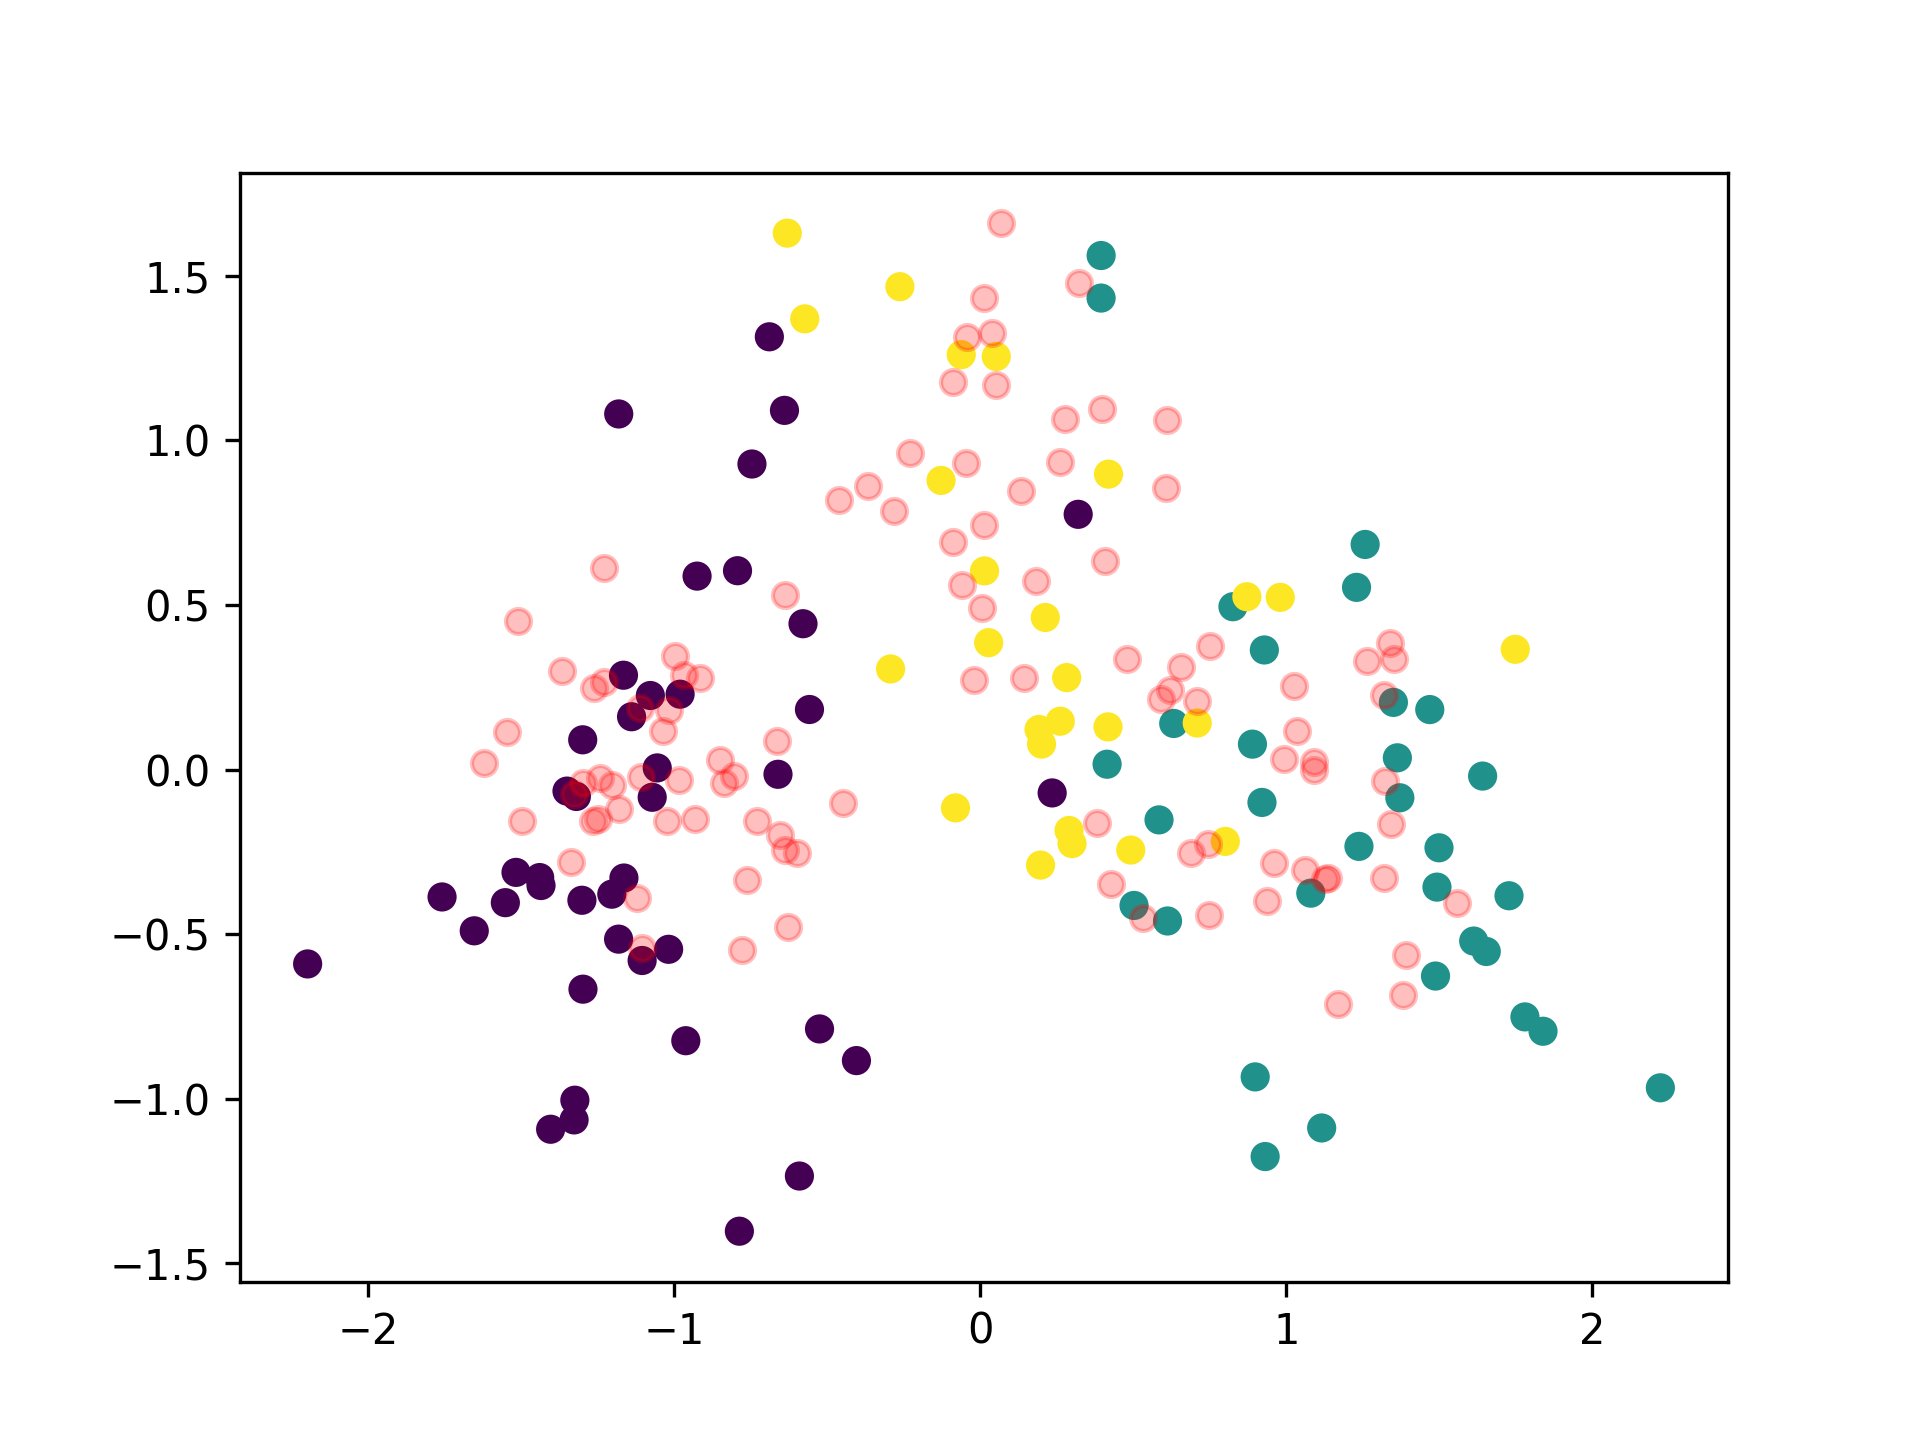

In [36]:
from scipy.linalg import orthogonal_procrustes

# MSE for latent position estimates
Z = params['Z']
R, _ = orthogonal_procrustes(model.Z_, Z)
U_est = model.Z_ @ R
print(np.mean((U_est - Z) ** 2))

plt.scatter(U_est[:, 0], U_est[:, 1], c=params['c'])
plt.scatter(Z[:, 0], Z[:,1], alpha=0.25, c='red')

## MSE and PC (Sender Effects)

In [37]:
np.corrcoef(model.s_, params['s'].ravel())[0,1]

0.9181761151629348

In [38]:
np.mean((model.s_ - params['s'].ravel()) ** 2)

0.21555989381171894

## MSE and PC (reciever effects)

In [39]:
np.corrcoef(model.r_, params['r'].ravel())[0,1]

0.9415900745877185

In [40]:
np.mean((model.r_ - params['r'].ravel()) ** 2)

0.2675190770294781

## MSE for $\phi$ and $\rho$

In [41]:
np.abs(model.dist_coef_ - params['dist_coef'])

0.027589081353046607

In [42]:
np.abs(model.recip_coef_ - params['recip_coef'])

0.124577831254988

# MSE of $\beta$

In [43]:
np.mean((model.beta_dyad_ - params['beta_dyad']) ** 2)

0.002014822407346628